In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as mat
import datetime as dt
sys.path.append('../src')
import mta_data_clean as mc

In [3]:
data_path = '../data/'
pickle_file = 'mta_data.pickle'
busy_pickle_file = 'mta_busy_stations.pickle'

In [47]:
df = mc.mta_data_pickle_read(data_path+busy_pickle_file)
df.reset_index(inplace=True, drop=True)

In [48]:
df.describe()

,entries,exits,deltaEntry,deltaExit
count,3.646490e+05,3.646490e+05,364649.000000,364649.000000
mean,5.863907e+07,5.350230e+07,196.661093,179.038988
std,2.574103e+08,2.503959e+08,311.406071,309.090482
min,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,7.162760e+05,4.069420e+05,0.000000,0.000000
50%,3.590709e+06,2.239156e+06,49.000000,51.000000
75%,8.888716e+06,6.873947e+06,273.000000,232.000000
max,2.129395e+09,2.048360e+09,6552.000000,9430.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364649 entries, 0 to 1221040
Data columns (total 10 columns):
station       364649 non-null object
division      364649 non-null object
date          364649 non-null datetime64[ns]
time          364649 non-null object
desc          364649 non-null object
entries       364649 non-null int64
exits         364649 non-null int64
weekday       364649 non-null object
deltaEntry    364649 non-null int64
deltaExit     364649 non-null int64
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 30.6+ MB


In [49]:
deltaEntry_sorted = df.sort_values('deltaEntry', ascending = False).groupby('station').head(1)
deltaEntry_sorted.head(20)

,station,division,date,time,desc,entries,exits,weekday,deltaEntry,deltaExit
137234,34 ST-PENN STA,IND,2019-04-19,08:00:00,REGULAR,120158,75320,Friday,6552,0
357106,GRD CNTRL-42 ST,IRT,2019-05-09,20:00:00,REGULAR,2483857,349727,Thursday,3199,32
124063,14 ST-UNION SQ,BMT,2019-04-17,21:00:00,REGULAR,16211164,6495020,Wednesday,2830,161
132665,59 ST COLUMBUS,IND,2019-04-18,20:00:00,REGULAR,24430932,9999050,Thursday,2698,199
122248,34 ST-HERALD SQ,BMT,2019-04-16,20:00:00,REGULAR,26792780,11094389,Tuesday,2693,469
199736,14 ST,IND,2019-04-25,21:00:00,REGULAR,123278577,1650633,Thursday,2577,33
94645,PATH NEW WTC,PTH,2019-04-09,19:47:50,REGULAR,82022,74002,Tuesday,2447,233
85453,LEXINGTON AV/53,IND,2019-04-11,20:00:00,REGULAR,1869880,522039,Thursday,2271,140
224024,TIMES SQ-42 ST,IRT,2019-04-25,20:00:00,REGULAR,53138550,894506,Thursday,2196,177
139916,W 4 ST-WASH SQ,IND,2019-04-18,21:00:00,REGULAR,21363396,5867640,Thursday,2193,227


In [38]:
pd.pivot_table(df, index = ['weekday'],values = ['deltaEntry','deltaExit'], aggfunc =[np.sum])

sum          
          deltaEntry deltaExit
weekday                       
Friday      11527266  10561840
Monday      11987867  10670852
Saturday     6036634   5870317
Sunday       4705682   4460417
Thursday    12483572  11272520
Tuesday     12456221  11171322
Wednesday   12515029  11279120

In [19]:
grouped = df.groupby('weekday').deltaEntry.sum().reset_index()
grouped_sorted = grouped.sort_values('deltaEntry', ascending=False)
grouped_sorted

,weekday,deltaEntry
6,Wednesday,12515029
4,Thursday,12483572
5,Tuesday,12456221
1,Monday,11987867
0,Friday,11527266
2,Saturday,6036634
3,Sunday,4705682


In [39]:
pd.pivot_table(new_df, index = 'station',values = ['deltaEntry','deltaExit'])

,deltaEntry,deltaExit
station,,
125 ST,2512239,2084396
14 ST,1869313,1688395
14 ST-UNION SQ,3387368,3443652
23 ST,3604025,2802673
28 ST,1572317,1474767
34 ST-HERALD SQ,3650456,3877498
34 ST-PENN STA,5556383,5164238
42 ST-BRYANT PK,1149726,1264427
42 ST-PORT AUTH,3061583,2683637


In [68]:
new_df = df.groupby(['weekday'], sort=True).sum().reset_index()
new_df = new_df.sort_values(['deltaEntry', 'deltaExit'], ascending=[False,False])
new_df = new_df.drop(columns=['entries','exits'])
new_df

,weekday,deltaEntry,deltaExit
6,Wednesday,12515029,11279120
4,Thursday,12483572,11272520
5,Tuesday,12456221,11171322
1,Monday,11987867,10670852
0,Friday,11527266,10561840
2,Saturday,6036634,5870317
3,Sunday,4705682,4460417


([<matplotlib.axis.XTick at 0x1025fa0f90>,
 <a list of 7 Text xticklabel objects>)

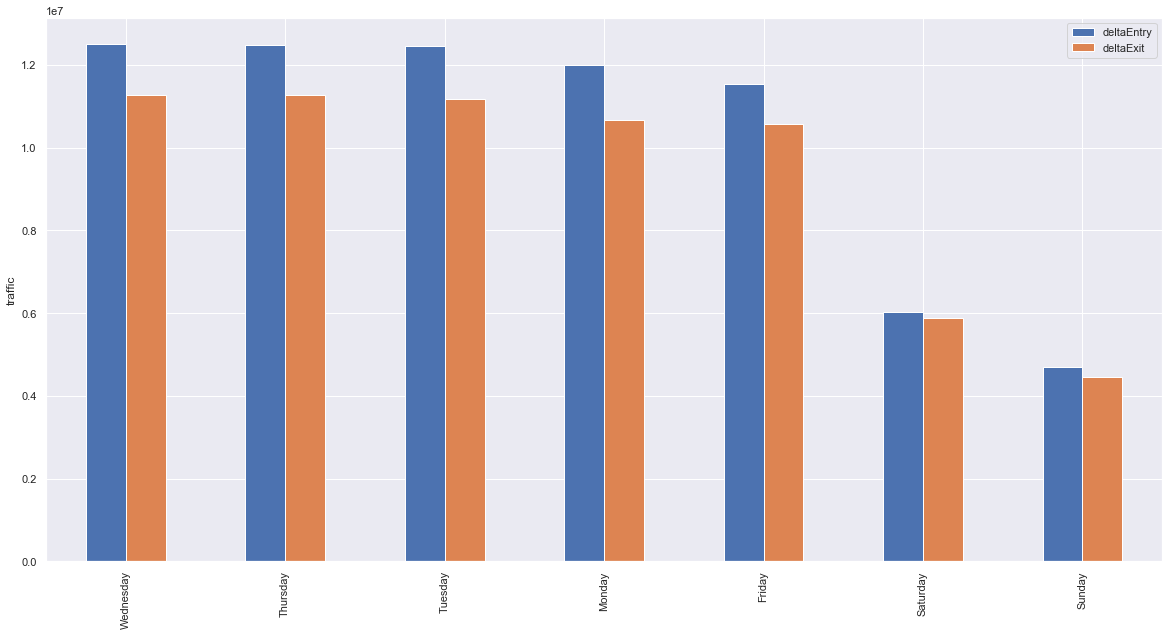

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
new_df.plot(kind= 'bar', figsize = [20,10])
plt.ylabel('traffic')
positions = [0,1,2,3,4,5,6]
weekdays = ('Wednesday','Thursday','Tuesday','Monday','Friday','Saturday','Sunday')
labels = weekdays
plt.xticks(positions,labels)